In [1]:
!wget https://cocl.us/datascience_survey_data -O survey.csv

--2018-12-22 09:48:09--  https://cocl.us/datascience_survey_data
Resolving cocl.us (cocl.us)... 159.8.72.228
Connecting to cocl.us (cocl.us)|159.8.72.228|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/coursera/Topic_Survey_Assignment.csv [following]
--2018-12-22 09:48:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/coursera/Topic_Survey_Assignment.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247 [application/octet-stream]
Saving to: ‘survey.csv’

survey.csv          100%[===================>]     247  --.-KB/s    in 0s      

2018-12-22 09:

In [4]:
!pwd
!ls -al

/Users/aspiela/notebooks
total 4504
drwxr-xr-x   11 aspiela  staff      352 22 Dec 09:49 .
drwxr-xr-x+ 179 aspiela  staff     5728 20 Dec 17:18 ..
drwxr-xr-x    5 aspiela  staff      160 22 Dec 09:47 .ipynb_checkpoints
-rw-r--r--    1 aspiela  staff     9376 16 Dec 10:20 3.7
-rw-r--r--    1 aspiela  staff   227673 16 Dec 16:13 IBM linear regression.ipynb
-rw-r--r--    1 aspiela  staff     2060 22 Dec 09:49 Untitled.ipynb
-rw-r--r--    1 aspiela  staff    10623 18 Dec 11:31 hist.png
-rw-r--r--    1 aspiela  staff  1773826 20 Dec 18:46 maps choropleth.ipynb
drwxr-xr-x    8 aspiela  staff      256 18 Dec 08:36 nasa
-rw-r--r--@   1 aspiela  staff      247 12 Nov 18:49 survey.csv
-rw-r--r--@   1 aspiela  staff   252515 20 Dec 18:10 world_countries.json


In [3]:
!head survey.csv

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("survey.csv", index_col=0)
df.head()

Very interested  Somewhat interested  \
Big Data (Spark / Hadoop)              1332                  729   
Data Analysis / Statistics             1688                  444   
Data Journalism                         429                 1081   
Data Visualization                     1340                  734   
Deep Learning                          1263                  770   

                            Not interested  
Big Data (Spark / Hadoop)              127  
Data Analysis / Statistics              60  
Data Journalism                        610  
Data Visualization                     102  
Deep Learning                          136

In [14]:
df = df.sort_values(by="Very interested", ascending=False)
df

Very interested  Somewhat interested  \
Data Analysis / Statistics             1688                  444   
Machine Learning                       1629                  477   
Data Visualization                     1340                  734   
Big Data (Spark / Hadoop)              1332                  729   
Deep Learning                          1263                  770   
Data Journalism                         429                 1081   

                            Not interested  
Data Analysis / Statistics              60  
Machine Learning                        74  
Data Visualization                     102  
Big Data (Spark / Hadoop)              127  
Deep Learning                          136  
Data Journalism                        610

In [16]:
df.dtypes

Very interested        int64
Somewhat interested    int64
Not interested         int64
dtype: object

In [20]:
df.sum(axis=1)

Data Analysis / Statistics    2192
Machine Learning              2180
Data Visualization            2176
Big Data (Spark / Hadoop)     2188
Deep Learning                 2169
Data Journalism               2120
dtype: int64

In [21]:
resp_no = 2233

In [25]:
df = df.astype(float)

In [27]:
df = df/resp_no

In [28]:
df

Very interested  Somewhat interested  \
Data Analysis / Statistics         0.755934             0.198836   
Machine Learning                   0.729512             0.213614   
Data Visualization                 0.600090             0.328706   
Big Data (Spark / Hadoop)          0.596507             0.326467   
Deep Learning                      0.565607             0.344828   
Data Journalism                    0.192118             0.484102   

                            Not interested  
Data Analysis / Statistics        0.026870  
Machine Learning                  0.033139  
Data Visualization                0.045678  
Big Data (Spark / Hadoop)         0.056874  
Deep Learning                     0.060905  
Data Journalism                   0.273175

In [48]:
df.iloc[:, 1].values

array([0.19883565, 0.21361397, 0.32870578, 0.32646664, 0.34482759,
       0.4841021 ])

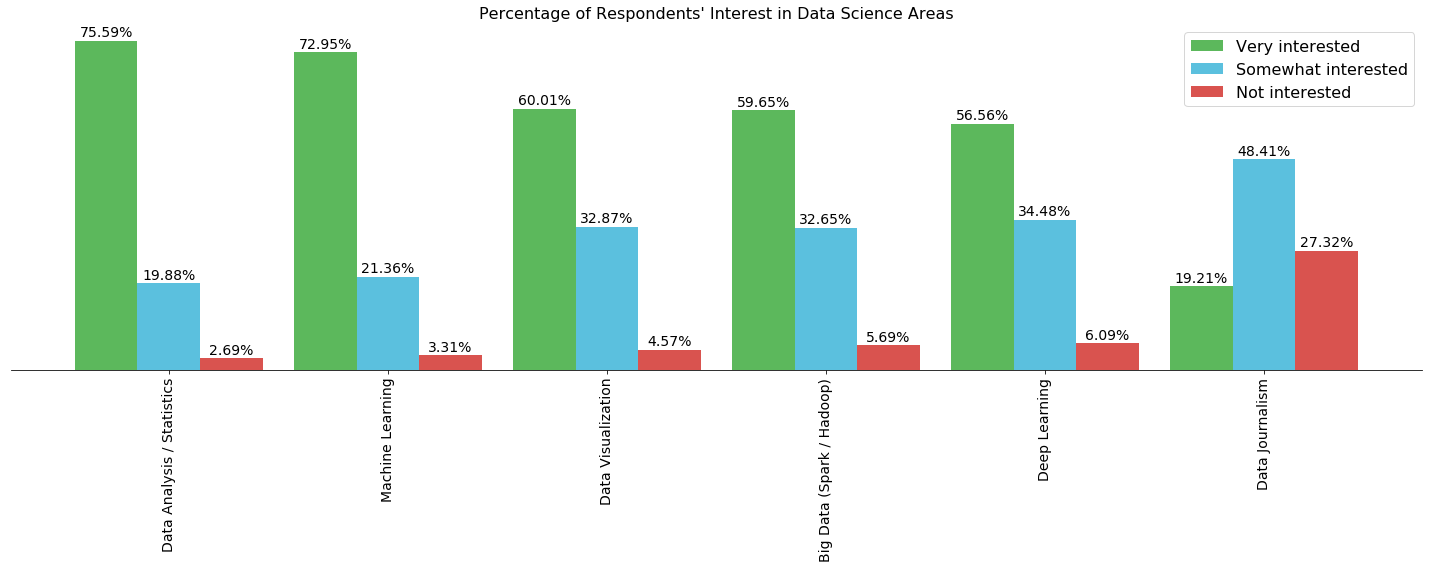

In [171]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.get_yaxis().set_ticks([])


bar_width=0.8
no_choices = len(df.columns)
colors = ["#5cb85c", "#5bc0de", "#d9534f"]

factor = (no_choices + 0.5) * bar_width

for i in range(3):
    ax.bar(i*bar_width+np.arange(len(df.index))*factor, df.iloc[:, i].values, label=df.columns[i], color=colors[i])
    for text_i in range(len(df)):
        x = (i*bar_width+np.arange(len(df.index))*factor)[text_i]
        ax.text(x, df.iloc[text_i, i] + 0.01, 
                "{:.2f}%".format(100*df.iloc[text_i, i]), 
                horizontalalignment='center', fontsize=14)


ax.set_xticks(bar_width+np.arange(len(df.index))*factor)
ax.set_xticklabels(df.index.tolist(), fontsize=14, rotation=90)

ax.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize=16)
ax.legend(loc="upper right", fontsize=16)
#ax.autoscale_view()

fig.tight_layout()
fig.savefig("barchar.png")

In [108]:
!wget https://cocl.us/sanfran_crime_dataset -O sf_crime.csv
!head sf_crime.csv

--2018-12-22 11:14:20--  https://cocl.us/sanfran_crime_dataset
Resolving cocl.us (cocl.us)... 159.8.72.228
Connecting to cocl.us (cocl.us)|159.8.72.228|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/nmcltjmocdi8sd5tk93uembzdec8zyaq.csv [following]
--2018-12-22 11:14:24--  https://ibm.box.com/shared/static/nmcltjmocdi8sd5tk93uembzdec8zyaq.csv
Resolving ibm.box.com (ibm.box.com)... 185.235.236.197
Connecting to ibm.box.com (ibm.box.com)|185.235.236.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/shared/static/nmcltjmocdi8sd5tk93uembzdec8zyaq.csv [following]
--2018-12-22 11:14:24--  https://ibm.ent.box.com/shared/static/nmcltjmocdi8sd5tk93uembzdec8zyaq.csv
Resolving ibm.ent.box.com (ibm.ent.box.com)... 185.235.236.211
Connecting to ibm.ent.box.com (ibm.ent.box.com)|185.235.236.211|:443... connected.
HTTP request sent, awaiting response... 302

In [109]:
sf_df = pd.read_csv("sf_crime.csv")

In [111]:
sf_df.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [125]:
sf_df1 = sf_df.groupby("PdDistrict").count()["Category"].reset_index().sort_values(by="Category", ascending=False)
sf_df1.rename({"PdDistrict": "Neighborhood", "Category":"Count"}, axis=1, inplace=True)
sf_df1.reset_index(drop=True)

Neighborhood  Count
0     SOUTHERN  28445
1     NORTHERN  20100
2      MISSION  19503
3      CENTRAL  17666
4      BAYVIEW  14303
5    INGLESIDE  11594
6      TARAVAL  11325
7   TENDERLOIN   9942
8     RICHMOND   8922
9         PARK   8699

In [127]:
sf_df.describe(include='object')

Category                      Descript DayOfWeek  \
count          150500                        150500    150500   
unique             39                           726         7   
top     LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO    Friday   
freq            40409                         17741     23371   

                          Date    Time PdDistrict Resolution  \
count                   150500  150500     150499     150500   
unique                     366    1439         10         14   
top     01/01/2016 12:00:00 AM   12:00   SOUTHERN       NONE   
freq                       558    3842      28445     107780   

                       Address                              Location  
count                   150500                                150500  
unique                   16130                                 19386  
top     800 Block of BRYANT ST  (37.775420706711, -122.403404791479)  
freq                      3561                                  3536

In [128]:
!wget https://cocl.us/sanfran_geojson -O sf_geo.json

--2018-12-22 11:24:09--  https://cocl.us/sanfran_geojson
Resolving cocl.us (cocl.us)... 159.8.72.228
Connecting to cocl.us (cocl.us)|159.8.72.228|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson [following]
--2018-12-22 11:24:10--  https://ibm.box.com/shared/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson
Resolving ibm.box.com (ibm.box.com)... 185.235.236.197
Connecting to ibm.box.com (ibm.box.com)|185.235.236.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/shared/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson [following]
--2018-12-22 11:24:10--  https://ibm.ent.box.com/shared/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson
Resolving ibm.ent.box.com (ibm.ent.box.com)... 185.235.236.211
Connecting to ibm.ent.box.com (ibm.ent.box.com)|185.235.236.211|:443... connected.
HTTP request sent, awaiting respo

In [133]:
sf_center = (37.773972, -122.431297)

In [130]:
import folium
from folium.plugins import MarkerCluster

In [168]:
sf_map = folium.Map(location=sf_center, zoom_start=12)

In [169]:
sf_map.choropleth(geo_data ="sf_geo.json", 
                  data=sf_df1,
                  columns=sf_df1.columns,
                  key_on = 'feature.properties.DISTRICT',
                  fill_color='YlOrRd', 
                  fill_opacity=0.7, 
                  line_opacity=0.2,
                  legend_name="Crime Rate in San Francisco"
                 )

/Users/aspiela/anaconda/envs/p37/lib/python3.7/site-packages/folium/folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [170]:
sf_map

In [167]:
sf_map.save("sf_map.html")

In [166]:
%%html
<img src='sf_map.png'>

In [163]:
!ls

3.7                         plotting asignment.ipynb
IBM linear regression.ipynb sf_crime.csv
barchar.png                 sf_geo.json
hist.png                    sf_map.png
maps choropleth.ipynb       survey.csv
nasa                        world_countries.json


In [172]:
!wget http://data-osi.opendata.arcgis.com/datasets/8aa1a023931e4364b3bc41530ba129e6_8.geojson -O dc_data.geojson

--2018-12-22 12:36:31--  http://data-osi.opendata.arcgis.com/datasets/8aa1a023931e4364b3bc41530ba129e6_8.geojson
Resolving data-osi.opendata.arcgis.com (data-osi.opendata.arcgis.com)... 54.211.239.21, 34.237.104.42
Connecting to data-osi.opendata.arcgis.com (data-osi.opendata.arcgis.com)|54.211.239.21|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://data-osi.opendata.arcgis.com/datasets/8aa1a023931e4364b3bc41530ba129e6_8.geojson [following]
--2018-12-22 12:36:31--  https://data-osi.opendata.arcgis.com/datasets/8aa1a023931e4364b3bc41530ba129e6_8.geojson
Connecting to data-osi.opendata.arcgis.com (data-osi.opendata.arcgis.com)|54.211.239.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘dc_data.geojson’

dc_data.geojson         [            <=>     ]   2.43M   399KB/s    in 5.6s    

2018-12-22 12:36:38 (441 KB/s) - ‘dc_data.geojson’ saved [2543688]



In [173]:
dublin_lon_lat = ( 53.350140, -6.266155 )

In [178]:
dub_map = folium.Map(location=dublin_lon_lat, zoom_start=11)

In [180]:
!head -n 40 dc_data.geojson

{"type":"FeatureCollection","features":[{"type":"Feature","properties":{"OBJECTID":1,"MD_ID":"4015001","FIRST_COUNTY":"CARLOW","FIRST_CONTAE":"Ceatharlach","FIRST_PROVINCE":"Leinster","FIRST_MD_ENGLISH":"Municipal District of Carlow","FIRST_MD_GAEILGE":" ","MaxSimpTol":50,"MinSimpTol":0.0030517578125,"GUID":"AFBC2F50-FC8C-435B-BC36-D1FD56DB5701","Shape__Area":0.0385513863355259,"Shape__Length":1.50955765285486},"geometry":{"type":"Polygon","coordinates":[[[-6.96468384591913,52.8100568718072],[-6.95848038246132,52.8116729581608],[-6.95509408214319,52.8139892406946],[-6.95191067774731,52.8148193497172],[-6.94970875079892,52.818454083578],[-6.94412825103952,52.8213426125022],[-6.93922511484173,52.825798228474],[-6.93756434892285,52.8287404161761],[-6.94021538408826,52.8333566230165],[-6.9460880561036,52.8395899768949],[-6.93280065201817,52.8435413521455],[-6.93193904177389,52.8464278450368],[-6.93514048294522,52.8528350978091],[-6.93371902503223,52.8547315018519],[-6.93678523953988,52.860

2.9157090112663],[-8.95402386104623,52.9165423926494],[-8.94952690749249,52.9134704139977],[-8.95043997137962,52.9111909663523],[-8.95403663113764,52.9107419074167],[-8.95466401758097,52.9093974145704],[-8.95841517920561,52.9091040806698],[-8.95969277231865,52.9081901918435],[-8.95880856614402,52.9050789490372],[-8.95622535333341,52.903752352746],[-8.95685566499287,52.9029138437094],[-8.95477253081638,52.9028902849316],[-8.95256282947447,52.9013291133484],[-8.95778176225877,52.8995101602286],[-8.96286818819746,52.9023692796176],[-8.96687135212771,52.9027160377635],[-8.96626289082278,52.9003887955918],[-8.9695334433294,52.8980872596289],[-8.96490508390945,52.8969348601553],[-8.96805802109108,52.893574646574],[-8.96545415803246,52.8930286721133],[-8.966684307958,52.8928601822569],[-8.96774527682612,52.8907332324346],[-8.97421885164009,52.8910685295953],[-8.9743946304898,52.8928413487703],[-8.97667421954459,52.8940394177542],[-8.97602217150848,52.9000701008954],[-8.97261917141012,52.90420

13204698]]],[[[-9.92682632464128,51.6282394762341],[-9.92718708839979,51.6278865749517],[-9.92774074870403,51.6279240193102],[-9.92682632464128,51.6282394762341]]],[[[-9.89857084584335,51.6396133316802],[-9.89981860621402,51.6393332428928],[-9.89954842510211,51.6395885445766],[-9.89857084584335,51.6396133316802]]],[[[-9.89994240657113,51.6393961159376],[-9.90138721630111,51.6392093897894],[-9.90069247410824,51.6395906873588],[-9.89994240657113,51.6393961159376]]],[[[-9.8981490825651,51.6398212732301],[-9.89837064213114,51.6397373499772],[-9.89853097055291,51.6398320631183],[-9.8981490825651,51.6398212732301]]],[[[-9.89878824653385,51.639911335384],[-9.89901193131554,51.6397745473958],[-9.89929397443812,51.6399661968046],[-9.89878824653385,51.639911335384]]],[[[-9.88685764021219,51.6412956835677],[-9.8854638137131,51.6409560607025],[-9.88617631677442,51.6403185062457],[-9.88939559542034,51.6404969519143],[-9.88685764021219,51.6412956835677]]],[[[-9.78276211571804,51.6472365982239],[-9.7

40604915129724,55.0204470742547],[-8.40646339594892,55.0204569221129],[-8.40592497162631,55.0209975077656],[-8.40604915129724,55.0204470742547]]],[[[-8.41208192839352,55.0130086899982],[-8.4184228912203,55.0156574162195],[-8.42050653524792,55.0175924310638],[-8.42026672404574,55.0193311985126],[-8.42300683350829,55.0196546935417],[-8.42406964362096,55.021180605672],[-8.42126391821526,55.0228124718644],[-8.42135374848757,55.0238755598254],[-8.42244383505799,55.0237149736872],[-8.42195915415837,55.0263547259386],[-8.42732785084371,55.0257939779442],[-8.42941799177712,55.0264869908809],[-8.43005822067113,55.0255948445771],[-8.43181873572072,55.0254232404781],[-8.43515114276745,55.0262368224549],[-8.43628878168232,55.0258412224545],[-8.43689650137887,55.0271649573318],[-8.43841452365105,55.0274978212982],[-8.43620364588094,55.0283076305297],[-8.43719187516319,55.0301216192637],[-8.43638854598716,55.0307054052888],[-8.43592386346034,55.0296617812978],[-8.43474801878707,55.0303763228314],[-8

3916490973126,53.4121038757381],[-8.23811198685447,53.4107933333339],[-8.23810272202516,53.410753249779],[-8.23810015727827,53.4107421525362],[-8.23805805150458,53.4103408989573],[-8.23795584540628,53.407251413161],[-8.23804580114766,53.4070771225233],[-8.23804600943964,53.4070767176996],[-8.23825217432093,53.4068056583825],[-8.23782663856715,53.4059377020966],[-8.23478358447579,53.4053232618545],[-8.23207012036229,53.4033476191945],[-8.23157045500202,53.4009889714339],[-8.22519966230817,53.3970591116404],[-8.22459177544363,53.3953853554376],[-8.22686074401018,53.3905998953468],[-8.23124914493459,53.388655450818],[-8.23049011313191,53.3860218019347],[-8.23604072799857,53.3827722079934],[-8.23449537906343,53.3815991383898],[-8.23645441471653,53.3801391277674],[-8.23789538045952,53.380535831611],[-8.24296616564774,53.3758517480561],[-8.24624283952341,53.374569414957],[-8.24319911026332,53.3697371645399],[-8.24370915379132,53.3669949890112],[-8.2425027295568,53.3659290720156],[-8.23737066

4432321104],[-8.19387917948312,53.0910633573782],[-8.19487207064966,53.0913857021909],[-8.19699906870881,53.0901145920805],[-8.19843220295273,53.0842036051465],[-8.20846892399879,53.0794447257719],[-8.21355315931493,53.078399955432],[-8.21874234878742,53.0676134737986],[-8.24933967955757,53.063274038874],[-8.26776013726263,53.0563635162542],[-8.26870398431702,53.0366323454648],[-8.27847514184657,53.0186808757592],[-8.30182702356775,53.0074530189174],[-8.31673868630853,52.985143225406],[-8.33886044035086,52.9875485374566],[-8.34550828724033,52.9850471433941],[-8.35007765216272,52.9795161471349],[-8.35175243104285,52.9755049842724],[-8.3534656213481,52.9745900857873],[-8.35614519937981,52.9745732271767],[-8.35881108103622,52.9712707109803],[-8.36388233767408,52.9714034475376],[-8.3671646175374,52.972708386364],[-8.36648222194623,52.9759581131198],[-8.36930179079846,52.9773395806973],[-8.37144602727449,52.9799557246297],[-8.38480230081126,52.983496370573],[-8.39721454783689,52.98432470010

7,53.1278379211733],[-6.78443615437542,53.115454617433],[-6.78134958547097,53.1073712857924],[-6.77961338221324,53.1063015499451],[-6.77941706387371,53.1029171082844],[-6.77654204652636,53.0992351637145],[-6.78242728233622,53.0964165024595],[-6.7829689074575,53.0976638599937],[-6.78610670252358,53.0963026589809],[-6.79903796739595,53.1082676119319],[-6.80403145222529,53.1075673140016],[-6.80538885850111,53.1061758227087],[-6.81217282450531,53.1037608890426],[-6.81216490670896,53.1052504531511],[-6.81414376911287,53.1058752089874],[-6.81843705031021,53.1056117246424],[-6.81897683736036,53.1079494213579],[-6.81697282698147,53.1086349841896],[-6.81982552877524,53.1110789751192],[-6.82701730930045,53.1131381084239],[-6.82895123727459,53.1121265804633],[-6.83298959921257,53.1148802223452],[-6.8361463184203,53.1128888907571],[-6.83913437125008,53.1127771747993],[-6.84417798162395,53.1106478367024],[-6.84892001681245,53.1108511354005],[-6.85136044566024,53.1103858902437],[-6.85204714916986,53

79,53.7546513009045],[-7.38127646059553,53.7518384448728],[-7.38378273872152,53.750897279803],[-7.38309669387572,53.7475856772934],[-7.38589890136907,53.7455091385086],[-7.38532747809157,53.7434963293957],[-7.38639649617732,53.7418043324631],[-7.3842702476037,53.7391227163652],[-7.38501082480599,53.7371713373075],[-7.38660295770247,53.7364216299112],[-7.38575316474688,53.7351400363676],[-7.3887945935377,53.7349641468082],[-7.38985353298258,53.733641950159],[-7.39376857852492,53.7323069519004],[-7.39529242031468,53.7337227350853],[-7.39770768786335,53.7326405049271],[-7.39884193325497,53.7341594258814],[-7.40114404880559,53.7334328823021],[-7.40354062777548,53.7340208767553],[-7.40592574225405,53.7323857433246],[-7.40523782060466,53.7304927331782],[-7.40711976071638,53.7291074718986],[-7.40643784730263,53.7259033586088],[-7.40947667932771,53.7258577132135],[-7.41639751602305,53.7239586234782],[-7.42294770244543,53.7308736434217],[-7.4296128397415,53.734930935557],[-7.43798503404787,53.7

,53.9710726834408],[-9.80211161863498,53.9719366282245],[-9.80099826356912,53.9715775638161],[-9.80086415289853,53.9723747747994],[-9.79861349149894,53.9711893867209],[-9.79765559579109,53.9722848121951],[-9.79859665860511,53.9730069065411],[-9.79630702212233,53.9729261088175],[-9.79468840669039,53.9742278234466],[-9.79589318982645,53.9750111569032],[-9.79467038901328,53.9752219749034],[-9.79590384658608,53.9752206182016],[-9.79627092097236,53.9748498040245],[-9.79797974193971,53.9754656407135],[-9.79947195831395,53.9727036061783],[-9.80054216051208,53.9733144469817],[-9.80470777466497,53.9725738808494],[-9.80510285904764,53.9735969427979],[-9.80609077994519,53.9733767153288],[-9.80591467616049,53.9745635362701],[-9.80793113991185,53.9734136160526],[-9.80766169752846,53.975977215116],[-9.80953280996025,53.9747272601798],[-9.80903112155054,53.9736060937778],[-9.81192683303925,53.9738492670525],[-9.81003889966627,53.9730872621809],[-9.80859459110707,53.97351762524],[-9.80734279974119,53.

48470579,53.2808996532929],[-7.67523112779763,53.2913385912855],[-7.67327891878314,53.2931450220966],[-7.67675463685117,53.2954087037717],[-7.69009230963878,53.2979254150056],[-7.69414384546737,53.2979421003495],[-7.69696882813102,53.2952194258184],[-7.69841071165971,53.2979414522876],[-7.69779152296386,53.2999056550617],[-7.70511375707511,53.3043580544271],[-7.70771035785882,53.3037046804738],[-7.71105605623195,53.3009829592437],[-7.72326556673846,53.2966954120043],[-7.73974081016458,53.3055007738583],[-7.73872960484925,53.3066166738497],[-7.74144035042294,53.3084893888495],[-7.76505622383026,53.3205098667649],[-7.7572917056528,53.3248752194739],[-7.75460748719634,53.3273127501035],[-7.74808219428129,53.3278870712237],[-7.7567708066292,53.3333536939247],[-7.75718749682804,53.3380398431947],[-7.76282002168651,53.3480812310478],[-7.74297291923034,53.3540137342181],[-7.71728975578508,53.3600566012964],[-7.7149955240513,53.3623371612383],[-7.70417048763853,53.3660692944004],[-7.7089426755

tes":[[[[-7.38720068301799,52.1289325975256],[-7.38635544998923,52.1284751973249],[-7.38680927084722,52.1284930907486],[-7.38720068301799,52.1289325975256]]],[[[-7.38034481759067,52.1319680854194],[-7.38041925174996,52.1317396458937],[-7.38051795110592,52.1324860368808],[-7.38034481759067,52.1319680854194]]],[[[-7.3794753430945,52.1327160649756],[-7.37959567294712,52.1320441840238],[-7.37982383062844,52.1327339972124],[-7.3794753430945,52.1327160649756]]],[[[-7.30900283250861,52.1342768261632],[-7.30908791095648,52.1338770833053],[-7.30937946878759,52.134179470906],[-7.30900283250861,52.1342768261632]]],[[[-7.30374988361965,52.1355103149022],[-7.30411478823426,52.1349654469431],[-7.3042114297371,52.1355881233895],[-7.30374988361965,52.1355103149022]]],[[[-7.33297159588096,52.1360483216422],[-7.33302159019132,52.1359315236937],[-7.33313347653905,52.1360133713078],[-7.33297159588096,52.1360483216422]]],[[[-7.33159605349848,52.1361111237694],[-7.33160276868371,52.1358810903749],[-7.331841

In [181]:
import geojson

In [182]:
with open("dc_data.geojson", "r") as f:
    dc_data = geojson.load(f)

In [193]:
dc_data['features'][0]['properties'].keys()

dict_keys(['OBJECTID', 'MD_ID', 'FIRST_COUNTY', 'FIRST_CONTAE', 'FIRST_PROVINCE', 'FIRST_MD_ENGLISH', 'FIRST_MD_GAEILGE', 'MaxSimpTol', 'MinSimpTol', 'GUID', 'Shape__Area', 'Shape__Length'])

In [259]:
dc_df_keys = dc_data['features'][0]['properties'].keys()

dc_dict = {}

for feature in dc_data['features']:
    for property_ in feature['properties']:
        if property_ in dc_dict.keys():
            dc_dict[property_].append(feature['properties'][property_])
        else:
            dc_dict[property_] = [feature['properties'][property_]]
           

In [289]:
dc_df = pd.DataFrame(dc_dict)
dc_df

OBJECTID    MD_ID FIRST_COUNTY    FIRST_CONTAE FIRST_PROVINCE  \
0          1  4015001       CARLOW     Ceatharlach       Leinster   
1          2  4015002       CARLOW     Ceatharlach       Leinster   
2          3  4115001        CAVAN       An Cabhán         Ulster   
3          4  4115002        CAVAN       An Cabhán         Ulster   
4          5  4115003        CAVAN       An Cabhán         Ulster   
5          6  4215001        CLARE         An Clár        Munster   
6          7  4215002        CLARE         An Clár        Munster   
7          8  4215003        CLARE         An Clár        Munster   
8          9  4215004        CLARE         An Clár        Munster   
9         10  4315001         CORK        Corcaigh        Munster   
10        11  4315002         CORK        Corcaigh        Munster   
11        12  4315003         CORK        Corcaigh        Munster   
12        13  4315004         CORK        Corcaigh        Munster   
13        14  4315005         CORK        Corcaigh        Munster   
14        15  4315006         CORK        Corcaigh        Munster   
15        16  4315007         CORK        Corcaigh        Munster   
16        17  4315008         CORK        Corcaigh        Munster   
17        18  4415001      DONEGAL    Dún na nGall         Ulster   
18        19  4415002      DONEGAL    Dún na nGall         Ulster   
19        20  4415003      DONEGAL    Dún na nGall         Ulster   
20        21  4415004      DONEGAL    Dún na nGall         Ulster   
21        22  4415005      DONEGAL    Dún na nGall         Ulster   
22        23  5015001       GALWAY        Gaillimh       Connacht   
23        24  5015002       GALWAY        Gaillimh       Connacht   
24        25  5015003       GALWAY        Gaillimh       Connacht   
25        26  5015004       GALWAY        Gaillimh       Connacht   
26        27  5015005       GALWAY        Gaillimh       Connacht   
27        28  5115001        KERRY         Ciarraí        Munster   
28        29  5115002        KERRY         Ciarraí        Munster   
29        30  5115003        KERRY         Ciarraí        Munster   
..       ...      ...          ...             ...            ...   
65        66  6115001     MONAGHAN      Muineachán         Ulster   
66        67  6115002     MONAGHAN      Muineachán         Ulster   
67        68  6115003     MONAGHAN      Muineachán         Ulster   
68        69  6215001       OFFALY     Uíbh Fhailí       Leinster   
69        70  6215002       OFFALY     Uíbh Fhailí       Leinster   
70        71  6215003       OFFALY     Uíbh Fhailí       Leinster   
71        72  6315001    ROSCOMMON      Ros Comáin       Connacht   
72        73  6315002    ROSCOMMON      Ros Comáin       Connacht   
73        74  6315003    ROSCOMMON      Ros Comáin       Connacht   
74        75  6415001        SLIGO        Sligeach       Connacht   
75        76  6415002        SLIGO        Sligeach       Connacht   
76        77  6615001    TIPPERARY  Tiobraid Árann        Munster   
77        78  6615002    TIPPERARY  Tiobraid Árann        Munster   
78        79  6615003    TIPPERARY  Tiobraid Árann        Munster   
79        80  6615004    TIPPERARY  Tiobraid Árann        Munster   
80        81  6615005    TIPPERARY  Tiobraid Árann        Munster   
81        82  6715001    WATERFORD     Port Láirge        Munster   
82        83  6715002    WATERFORD     Port Láirge        Munster   
83        84  6715003    WATERFORD     Port Láirge        Munster   
84        85  6815001    WESTMEATH       An Iarmhí       Leinster   
85        86  6815002    WESTMEATH       An Iarmhí       Leinster   
86        87  6915001      WEXFORD     Loch Garman       Leinster   
87        88  6915002      WEXFORD     Loch Garman       Leinster   
88        89  6915003      WEXFORD     Loch Garman       Leinster   
89        90  6915004      WEXFORD     Loch Garman       Leinster   
90        91  7015001      WICKLOW   Cill Mhantáin       Leinster   
91

In [296]:
(dc_df["FIRST_MD_ENGLISH"].str.contains("Municipal")).value_counts()

True     77
False    18
Name: FIRST_MD_ENGLISH, dtype: int64

In [297]:
dc_df["FIRST_MD_ENGLISH"] == " "

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8      True
9     False
10    False
11    False
12     True
13     True
14    False
15    False
16    False
17    False
18     True
19     True
20     True
21    False
22    False
23    False
24     True
25     True
26    False
27    False
28    False
29    False
      ...  
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74     True
75    False
76    False
77    False
78    False
79    False
80    False
81     True
82     True
83     True
84    False
85    False
86     True
87    False
88    False
89    False
90    False
91    False
92    False
93    False
94    False
Name: FIRST_MD_ENGLISH, Length: 95, dtype: bool

In [301]:
ire_muni = dc_df[["FIRST_PROVINCE", "FIRST_COUNTY"]].groupby(["FIRST_PROVINCE"]).count()
ire_muni.reset_index(inplace=True)
ire_muni.index.name=""
ire_muni.columns = ["Province", "Total"]
ire_muni

Province  Total
                  
0  Connacht     17
1  Leinster     39
2   Munster     28
3    Ulster     11

In [299]:
ire_muni.sum(axis=0)

Total    95
dtype: int64

In [268]:
ire_muni = dc_df[["FIRST_PROVINCE", "FIRST_COUNTY"]].groupby(["FIRST_PROVINCE", "FIRST_COUNTY"]).count()



In [271]:
ire_co = ire_muni.reset_index()

In [274]:
ire_co = ire_co.groupby("FIRST_PROVINCE").count()
ire_co.index.name = ""
ire_co.columns = ["Total"]


Total
               
Connacht      5
Leinster     11
Munster       6
Ulster        3

In [275]:
dublin_lon_lat

(53.35014, -6.266155)

In [276]:
ire_co.reset_index(inplace=True)

In [278]:
ire_co.columns = ["province", "total"]

In [279]:
ire_co

province  total
0  Connacht      5
1  Leinster     11
2   Munster      6
3    Ulster      3

In [302]:
dc_map = folium.Map(location=dublin_lon_lat, zoom_start=8)

In [304]:
dc_map.choropleth(geo_data="dc_data.geojson", 
                  data=ire_muni, 
                  columns=ire_muni.columns,
                  key_on="feature.properties.FIRST_PROVINCE",
                  fill_color='RdYlGn'
                 )

In [305]:
dc_map

In [306]:
dc_map.save("ire.html")